# Quantum Simulation of Plasma Oscillations (QHO analogy)



**Contents:**

1. Theory: plasma oscillations and the quantum harmonic oscillator (QHO) analogy.
2. Single-qubit Qiskit simulation that mimics plasma oscillations via phase evolution.
3. Time-sweep visualization (probability of |1> vs time) — plot using matplotlib.
4. Two-qubit coupled-oscillators section (concept + circuit)




## 1. Theory

### Plasma oscillations (classical)

When electrons in a plasma are displaced relative to ions, a restoring electric field causes collective oscillations at the **plasma frequency**:

$$\omega_p = \sqrt{\frac{n_e e^2}{\varepsilon_0 m_e}}$$

The displacement satisfies:

$$\frac{d^2 x}{dt^2} + \omega_p^2 x = 0$$

This differential equation has the same form as the harmonic oscillator.

### Quantum harmonic oscillator (QHO)

The QHO Hamiltonian is:

$$H = \frac{p^2}{2m} + \frac{1}{2} m \omega^2 x^2$$

with quantized energies

$$E_n = \hbar \omega \left(n + \tfrac{1}{2}\right).$$

I build a **toy mapping** between a two-level quantum system (single qubit) and the lowest QHO states (|0> ↔ ground, |1> ↔ first excited) and simulate time evolution using phase gates to mimic the effect of $e^{-iHt/\hbar}$ for a simple harmonic-like Hamiltonian.



In [ ]:


from qiskit import QuantumCircuit 
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt



## 3. Single-qubit simulation (toy model)


1. Prepare a qubit in a superposition (Hadamard) — this represents a displaced oscillator.
2. Apply a phase rotation $P(\phi)=\mathrm{diag}(1, e^{i\phi})$ where $\phi = \omega_p t$ to
   mimic evolution under a harmonic-like Hamiltonian for time `t`.
3. Convert back (Hadamard) and readout the probability of measuring |1> as a function of time.

This produces a sinusoidal probability vs time curve analogous to oscillation between ground and first-excited states.


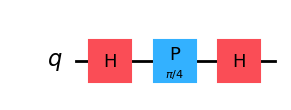

In [3]:
# Single-time circuit example

omega_p = 1.0  # normalized plasma frequency (arbitrary units)
t = np.pi / 4  # evolution time

qc = QuantumCircuit(1)
qc.h(0)                 # prepare superposition
qc.p(omega_p * t, 0)    # phase evolution ~ exp(-i H t / ħ) toy
qc.h(0)                 # rotate back to basis where we measure population

qc.draw('mpl')


Statevector:
Statevector([0.85355339+0.35355339j, 0.14644661-0.35355339j],
            dims=(2,))


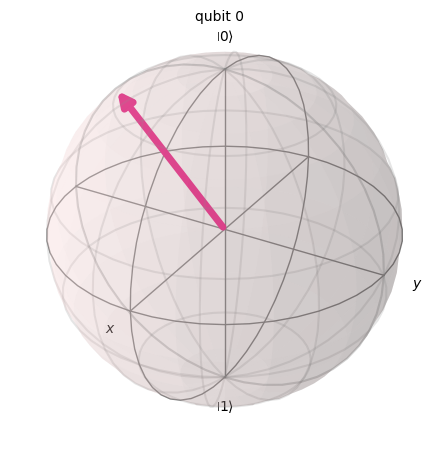

In [5]:
# Statevector & Bloch visualization for the single-time circuit
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result()
state = result.get_statevector()
print('Statevector:')
print(state)

# Bloch sphere (visual)
plot_bloch_multivector(state)


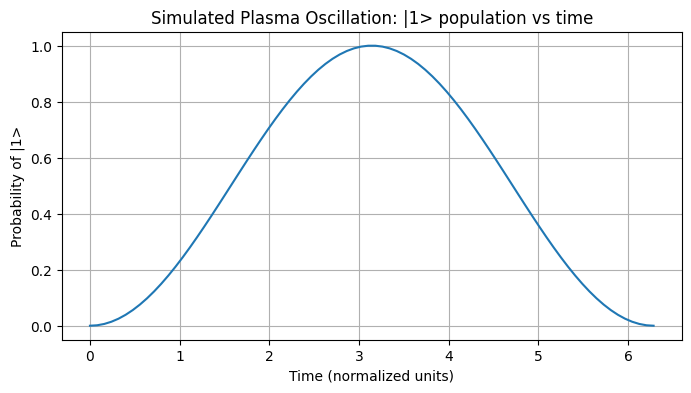

In [6]:
# 4. Time sweep: probability of |1> vs time
times = np.linspace(0, 2*np.pi, 80)  # simulate two full oscillations (in normalized units)
probs = []
for t in times:
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.p(omega_p * t, 0)
    qc.h(0)
    sv = Statevector.from_instruction(qc)
    p_dict = sv.probabilities_dict()
    # probabilities_dict keys like '0' and '1'
    p1 = p_dict.get('1', 0)
    probs.append(p1)

plt.figure(figsize=(8,4))
plt.plot(times, probs)
plt.xlabel('Time (normalized units)')
plt.ylabel('Probability of |1>')
plt.title('Simulated Plasma Oscillation: |1> population vs time')
plt.grid(True)
plt.show()


## 5. Discussion

The plot above shows a sinusoidal oscillation of the probability to find the system in the |1⟩ state. This is the toy-model analogue of electron density oscillations in a plasma: the phase accumulation from the $P(\phi)$ gate plays the role of $e^{-iHt/\hbar}$ with an effective frequency $\omega_p$.

**Limitations:**

- A single qubit cannot fully represent the continuous QHO. This is a pedagogical mapping to the lowest two levels.
- A more accurate simulation requires encoding multiple oscillator levels into multiple qubits (e.g., using bosonic encodings) or using more advanced Hamiltonian simulation techniques.




## 6. Two-qubit toy model (coupled oscillators)

This section provides a simple circuit that *illustrates* coupling between two modes (electron and ion or two electron modes). We use controlled rotations to transfer amplitude between qubits and visualize population exchange (beating).

**Note:** This is a toy, not a rigorously derived coupled-Hamiltonian simulator. It is suitable for demonstration/visualization only.


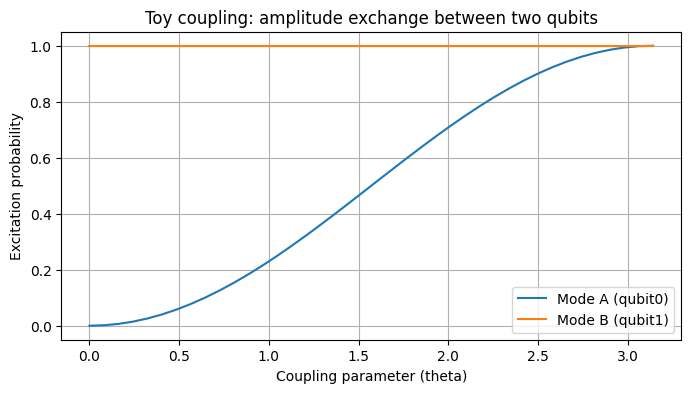

In [8]:
# Two-qubit toy: amplitude swapping over a simple parameter
def two_qubit_coupling_circuit(theta):
    qc = QuantumCircuit(2)
    # prepare initial excitation on qubit 0 (mode A)
    qc.x(0)
    # use a controlled rotation to partially swap amplitude to qubit 1
    qc.crx(theta, 0, 1)
    return qc

thetas = np.linspace(0, np.pi, 40)
p0 = []
p1 = []
for th in thetas:
    qc = two_qubit_coupling_circuit(th)
    sv = Statevector.from_instruction(qc)
    probs = sv.probabilities_dict()
    p0.append(probs.get('10', 0) + probs.get('11', 0))  # probability qubit0 excited
    p1.append(probs.get('01', 0) + probs.get('11', 0))  # probability qubit1 excited

plt.figure(figsize=(8,4))
plt.plot(thetas, p0, label='Mode A (qubit0)')
plt.plot(thetas, p1, label='Mode B (qubit1)')
plt.xlabel('Coupling parameter (theta)')
plt.ylabel('Excitation probability')
plt.title('Toy coupling: amplitude exchange between two qubits')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

This project established a simple but effective link between **plasma oscillations** and **quantum harmonic oscillator–like dynamics**, simulated using Qiskit.

### What we achieved:
- A **single-qubit phase evolution model** was used to reproduce oscillatory behavior analogous to plasma electron oscillations.
- A **two-qubit coupled system** was constructed to demonstrate mode coupling and energy exchange, conceptually similar to coupled plasma modes.

### Key insights:
- Even very small quantum systems (1–2 qubits) can meaningfully demonstrate fundamental physics concepts like oscillations, coupling, and approximate dynamics.

